In [1]:
import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd


In [2]:
df = pd.concat([
    pd.read_csv("./output/result_kl.csv", header=None),
    pd.read_csv("./output/result_std.csv", header=None),
    pd.read_csv("./output/result_others.csv", header=None),
])

In [3]:
#100 50 25 10 5 1
keep=["./bods/workloads/createdata_K100_L1.txt",
     "./bods/workloads/createdata_K50_L1.txt",
     "./bods/workloads/createdata_K25_L1.txt",
     "./bods/workloads/createdata_K10_L1.txt",
     "./bods/workloads/createdata_K5_L1.txt",
     "./bods/workloads/createdata_K1_L1.txt",
     "./bods/workloads/createdata_K0_0.txt",
     "./bods/workloads/createdata_K1_L5.txt",
     "./bods/workloads/createdata_K1_L10.txt",
     "./bods/workloads/createdata_K1_L25.txt",
     "./bods/workloads/createdata_K1_L50.txt",
     "./bods/workloads/createdata_K1_L100.txt",
     "./bods/workloads/createdata_K1_L100.txt",]

In [4]:
df=df[df[1]!="insertion_sort"]

In [5]:
df[1].unique()

array(['kl_sort', 'std_stable', 'radix_sort', 'merge_sort', 'quick_sort',
       'tim_sort'], dtype=object)

In [6]:
tdf=df[df[0]=="./bods/workloads/createdata_K100_L1.txt"]
tdf

,0,1,2
0,./bods/workloads/createdata_K100_L1.txt,kl_sort,3321717028
0,./bods/workloads/createdata_K100_L1.txt,std_stable,1170898157
0,./bods/workloads/createdata_K100_L1.txt,radix_sort,647436939
133,./bods/workloads/createdata_K100_L1.txt,merge_sort,1930473050
266,./bods/workloads/createdata_K100_L1.txt,quick_sort,778569042
399,./bods/workloads/createdata_K100_L1.txt,tim_sort,1463360332


In [7]:
kl=[]
radix=[]
merge=[]
quick=[]
tim=[]
stable=[]
insertion=[]

for filename in keep:
    tdf=df[df[0]== filename]
    for i in range(tdf.shape[0]):
        if tdf.iloc[i][1] == "kl_sort":
            kl.append(tdf.iloc[i][2])
            
        if tdf.iloc[i][1] == "radix_sort":
            radix.append(tdf.iloc[i][2])
            
        if tdf.iloc[i][1] == "merge_sort":
            merge.append(tdf.iloc[i][2])
            
        if tdf.iloc[i][1] == "quick_sort":
            quick.append(tdf.iloc[i][2])
            
        if tdf.iloc[i][1] == "tim_sort":
            tim.append(tdf.iloc[i][2])
            
        if tdf.iloc[i][1] == "std_stable":
            stable.append(tdf.iloc[i][2])
    

In [8]:
x=["100-1", "50-1", "25-1", "10-1", "5-1", "1-1", "0-0", "1-5", "1-10", "1-25", "1-50", "1-100", "100-100"]

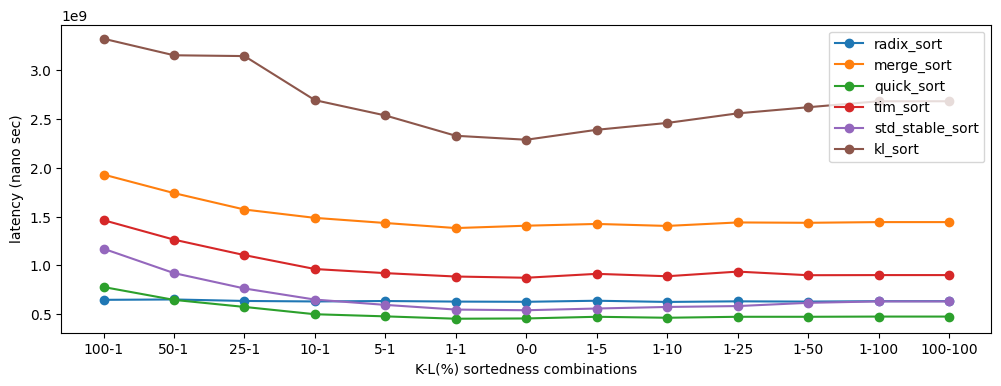

In [9]:
plt.figure(figsize=(12,4))
plt.plot(x, radix, marker='o', label="radix_sort")
plt.plot(x, merge, marker='o', label="merge_sort")
plt.plot(x, quick, marker='o', label="quick_sort")
plt.plot(x, tim, marker='o', label="tim_sort")
plt.plot(x, stable, marker='o', label="std_stable_sort")
plt.plot(x, kl, marker='o', label="kl_sort")
plt.xlabel("K-L(%) sortedness combinations")
plt.ylabel("latency (nano sec)")
plt.legend(loc='best')
# plt.savefig("output/result.png")
plt.show()

In [15]:
df = pd.read_csv("./output/result_april26.csv", header=None)
df = df.drop(columns=[4]) # Drop ALGO column
# Combine k-l
df['x'] = df[0].astype(str) + '-' + df[2].astype(str)
# Combine kdiv-ldiv
df['div'] = df[1].astype(str) + '-' + df[3].astype(str)

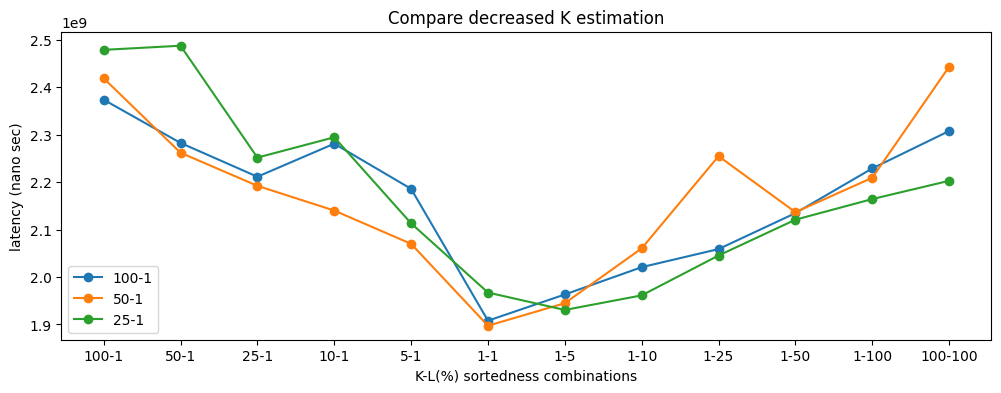

In [16]:
df_k = df[df[3] == 1] # Ensure only edit on k
x=["100-1", "50-1", "25-1", "10-1", "5-1", "1-1", "1-5", "1-10", "1-25", "1-50", "1-100", "100-100"]
plt.figure(figsize=(12,4))
for div in df_k['div'].unique():
    plt.plot(x, df_k[df_k['div'] == div][5], marker='o', label=div)
plt.title("Compare decreased K estimation")
plt.xlabel("K-L(%) sortedness combinations")
plt.ylabel("latency (nano sec)")
plt.legend(loc='best')
# plt.savefig("output/result.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


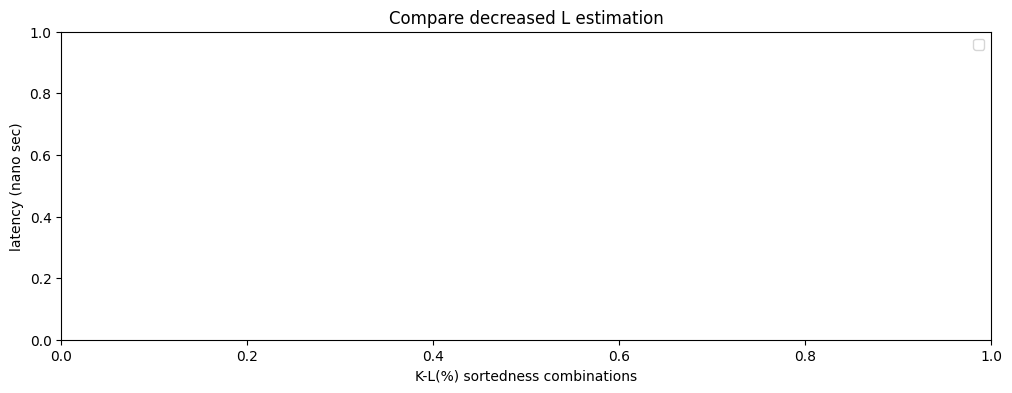

In [17]:
df_l = df[df[1] == 1] # Ensure only edit on l
x=["100-1", "50-1", "25-1", "10-1", "5-1", "1-1", "1-5", "1-10", "1-25", "1-50", "1-100", "100-100"]
plt.figure(figsize=(12,4))
for div in df_l['div'].unique():
    plt.plot(x, df_l[df_l['div'] == div][5], marker='o', label=div)
plt.title("Compare decreased L estimation")
plt.xlabel("K-L(%) sortedness combinations")
plt.ylabel("latency (nano sec)")
plt.legend(loc='best')
# plt.savefig("output/result.png")
plt.show()

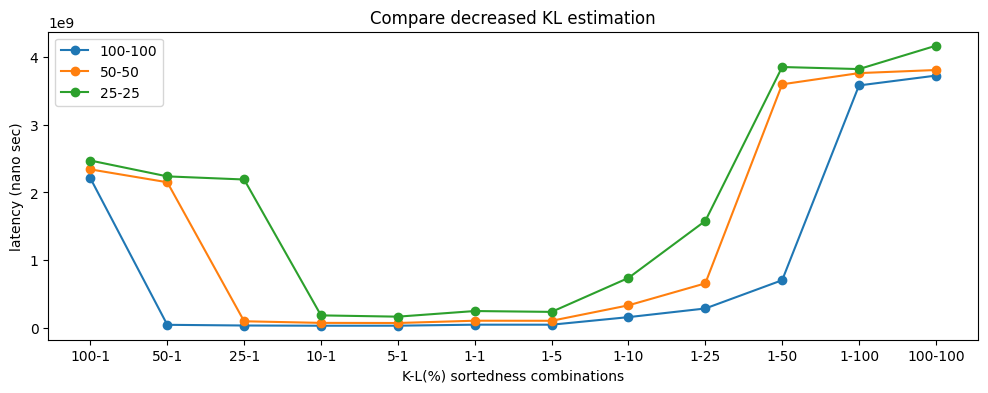

In [18]:
df_kl = df[df[1] == df[3]] # Ensure only edit on both k and l
x=["100-1", "50-1", "25-1", "10-1", "5-1", "1-1", "1-5", "1-10", "1-25", "1-50", "1-100", "100-100"]
plt.figure(figsize=(12,4))
for div in df_kl['div'].unique():
    plt.plot(x, df_kl[df_kl['div'] == div][5], marker='o', label=div)
plt.title("Compare decreased KL estimation")
plt.xlabel("K-L(%) sortedness combinations")
plt.ylabel("latency (nano sec)")
plt.legend(loc='best')
# plt.savefig("output/result.png")
plt.show()